# Clase 19 Mayo -- Practico 2

Para trabajar elegimos el dataset correspondiente a la precios de casas en california.
Este dataset establece puede usarse para explorar la relación entre los precios de las 
casas con la longitud, latitud, cantidad de habitaciones, proximidad al oceano, etc.

## Leyendo y explorando los datos

In [284]:
options(repr.plot.width=6, repr.plot.height=4)

In [285]:
data <- read.csv("input/housing.csv")

In [286]:
data[1:5,]

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
"-122,23","37,88",41,880,129,322,126,"8,3252",452600,NEAR BAY
"-122,22","37,86",21,7099,1106,2401,1138,"8,3014",358500,NEAR BAY
"-122,24","37,85",52,1467,190,496,177,"7,2574",352100,NEAR BAY
"-122,25","37,85",52,1274,235,558,219,"5,6431",341300,NEAR BAY
"-122,25","37,85",52,1627,280,565,259,"3,8462",342200,NEAR BAY


In [287]:
summary(data)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124,3   Min.   :32,54   Min.   : 1,00      Min.   :    2  
 1st Qu.:-121,8   1st Qu.:33,93   1st Qu.:18,00      1st Qu.: 1448  
 Median :-118,5   Median :34,26   Median :29,00      Median : 2127  
 Mean   :-119,6   Mean   :35,63   Mean   :28,64      Mean   : 2636  
 3rd Qu.:-118,0   3rd Qu.:37,71   3rd Qu.:37,00      3rd Qu.: 3148  
 Max.   :-114,3   Max.   :41,95   Max.   :52,00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1,0   Min.   :    3   Min.   :   1,0   Min.   : 0,4999  
 1st Qu.: 296,0   1st Qu.:  787   1st Qu.: 280,0   1st Qu.: 2,5634  
 Median : 435,0   Median : 1166   Median : 409,0   Median : 3,5348  
 Mean   : 537,9   Mean   : 1425   Mean   : 499,5   Mean   : 3,8707  
 3rd Qu.: 647,0   3rd Qu.: 1725   3rd Qu.: 605,0   3rd Qu.: 4,7432  
 Max.   :6445,0   Max.   :35682   

In [289]:
names(data)

[1] "longitude"          "latitude"           "housing_median_age"
 [4] "total_rooms"        "total_bedrooms"     "population"        
 [7] "households"         "median_income"      "median_house_value"
[10] "ocean_proximity"

In [290]:
sapply(data, class)

longitude           latitude housing_median_age        total_rooms 
         "numeric"          "numeric"          "numeric"          "numeric" 
    total_bedrooms         population         households      median_income 
         "numeric"          "numeric"          "numeric"          "numeric" 
median_house_value    ocean_proximity 
         "numeric"           "factor"

In [355]:
corr_matrix <- cor(data[1:9])
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,"1,00000000","-0,92466443","-0,10819681","0,04456798",NA,"0,099773223","0,05531009","-0,015175865","-0,04596662"
latitude,"-0,92466443","1,00000000","0,01117267","-0,03609960",NA,"-0,108784747","-0,07103543","-0,079809127","-0,14416028"
housing_median_age,"-0,10819681","0,01117267","1,00000000","-0,36126220",NA,"-0,296244240","-0,30291601","-0,119033990","0,10562341"
total_rooms,"0,04456798","-0,03609960","-0,36126220","1,00000000",NA,"0,857125973","0,91848449","0,198049645","0,13415311"
total_bedrooms,NA,NA,NA,NA,1,NA,NA,NA,NA
population,"0,09977322","-0,10878475","-0,29624424","0,85712597",NA,"1,000000000","0,90722227","0,004834346","-0,02464968"
households,"0,05531009","-0,07103543","-0,30291601","0,91848449",NA,"0,907222266","1,00000000","0,013033052","0,06584265"
median_income,"-0,01517587","-0,07980913","-0,11903399","0,19804965",NA,"0,004834346","0,01303305","1,000000000","0,68807521"
median_house_value,"-0,04596662","-0,14416028","0,10562341","0,13415311",NA,"-0,024649679","0,06584265","0,688075208","1,00000000"


Vemos que la "median house value" tiene buena correlación con "median income" y con "total bedrooms"

In [292]:
library("ggplot2")

Creamos 4 categorias de precios 

In [371]:
max(data$median_house_value)

[1] 500001

In [372]:
data$value_cat = round(data$median_house_value / max(data$median_house_value) * 3) + 1
data$value_cat <- as.factor(data$value_cat)

In [373]:
summary(data$value_cat)

1     2     3     4 
 2138 12720  4196  1586

Gráficamos las categorías que creamos usando como ejes "median income" y "total rooms"

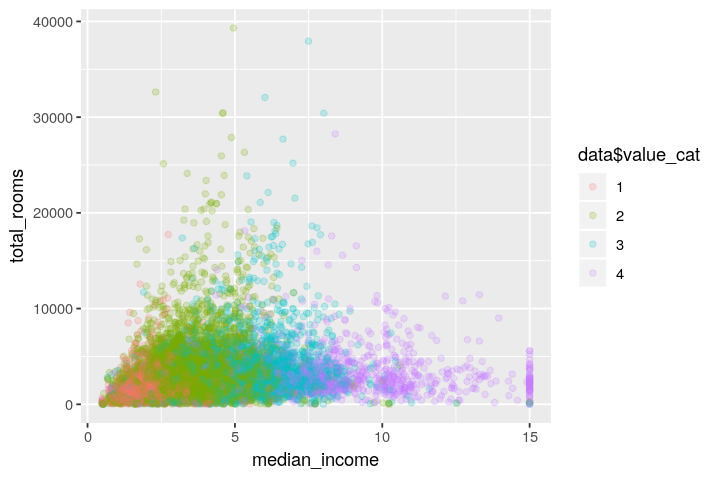

In [374]:
ggplot(data, aes(x=median_income, y=total_rooms, color=data$value_cat)) +
  geom_point(alpha = 0.2)

Vamos a aplciar un metodo de clustering para que nos diga como es la cercania al 
oceano de cada punto

In [375]:
names(data)

[1] "longitude"           "latitude"            "housing_median_age" 
 [4] "total_rooms"         "total_bedrooms"      "population"         
 [7] "households"          "median_income"       "median_house_value" 
[10] "ocean_proximity"     "value_cat"           "ocean_proximity_cat"

In [376]:
head(data)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,value_cat,ocean_proximity_cat
"-122,23","37,88",41,880,129,322,126,"8,3252",452600,NEAR BAY,4,4
"-122,22","37,86",21,7099,1106,2401,1138,"8,3014",358500,NEAR BAY,3,4
"-122,24","37,85",52,1467,190,496,177,"7,2574",352100,NEAR BAY,3,4
"-122,25","37,85",52,1274,235,558,219,"5,6431",341300,NEAR BAY,3,4
"-122,25","37,85",52,1627,280,565,259,"3,8462",342200,NEAR BAY,3,4
"-122,25","37,85",52,919,213,413,193,"4,0368",269700,NEAR BAY,3,4


In [377]:
library(mclust)

In [378]:
data$ocean_proximity_cat <- as.numeric(data$ocean_proximity)

In [379]:
summary(data$ocean_proximity_cat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1,000   1,000   2,000   2,166   2,000   5,000 

In [380]:
names(data)

[1] "longitude"           "latitude"            "housing_median_age" 
 [4] "total_rooms"         "total_bedrooms"      "population"         
 [7] "households"          "median_income"       "median_house_value" 
[10] "ocean_proximity"     "value_cat"           "ocean_proximity_cat"

In [412]:
set.seed(20)
#cluster <- kmeans(data[, c(1:3,6,9)], 4, nstart = 10)
cluster <- kmeans(data[, c(1:3,6,9)], 4, nstart = 10)
#cluster <- kmeans(data[, c("median_income", "total_rooms")], 5, nstart = 10)
cluster$size

[1] 3977 7484 1953 7226

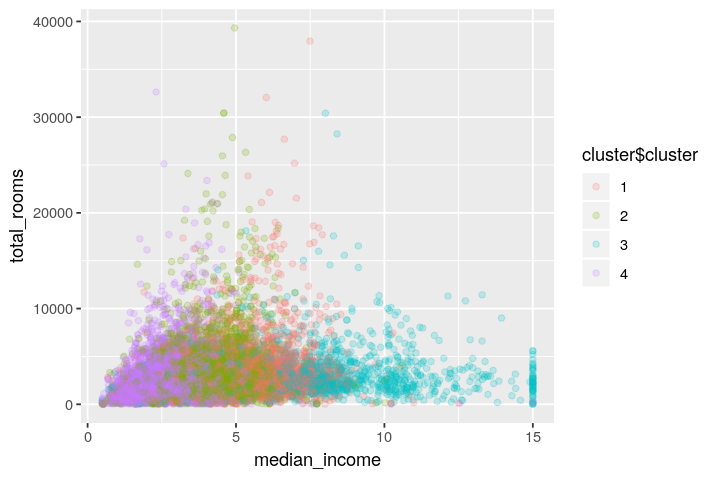

In [413]:
cluster$cluster <- as.factor(cluster$cluster)

ggplot(data, aes(x=median_income, y=total_rooms, color=cluster$cluster)) +
  geom_point(alpha = 0.2)

Si bien la divisiones no son tan claras como las generadas a partir de los datos reales, si se nota una tendencia en las division al hacer el clusterizado

El meta parametro k nos establece la cantidad grupos que vamos a generar, y podríamos obtener más escalones en la escala de precios. Vemos ejemplos con K=2 y K=10

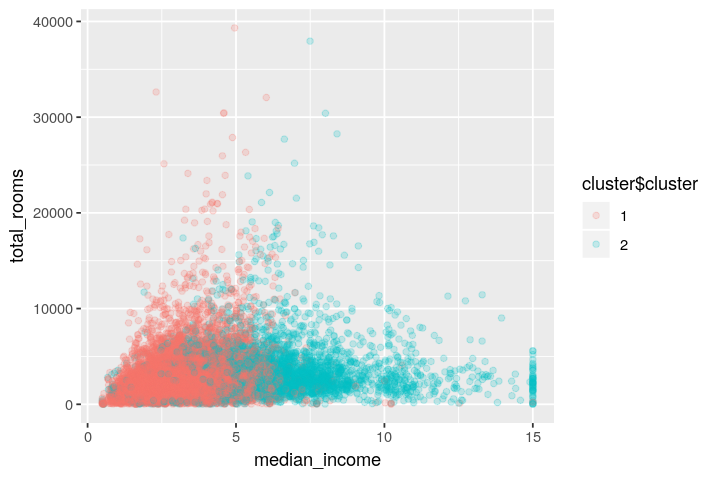

In [414]:
set.seed(20)
cluster <- kmeans(data[, c(1:3,6,9)], 2, nstart = 10)

cluster$cluster <- as.factor(cluster$cluster)
ggplot(data, aes(x=median_income, y=total_rooms, color=cluster$cluster)) +
  geom_point(alpha = 0.2)

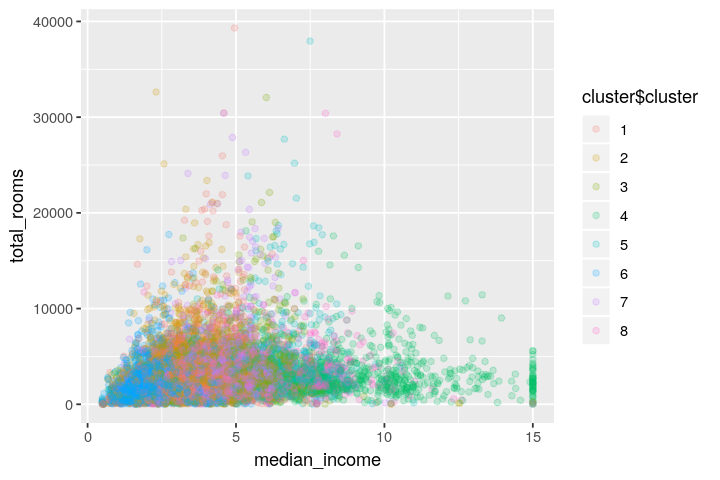

In [415]:
set.seed(20)
cluster <- kmeans(data[, c(1:3,6,9)], 8, nstart = 10)

cluster$cluster <- as.factor(cluster$cluster)
ggplot(data, aes(x=median_income, y=total_rooms, color=cluster$cluster)) +
  geom_point(alpha = 0.2)

Para determinar el mejor valor de K, lo mejor es recurrir al experto a dominio para que nos ayude a determinar ese valor de acuerdo a las categorías esperadas. Otra alternativa es hacerlo iterativamente luego de aplicar un algoritmo de machine learning, viendo que valores ayudan más al mismo

## Normalización

In [402]:
minmax_norm <- function(x){
    return ((x-min(x))/(max(x) - min(x)))
}

In [411]:
data_n <- as.data.frame(lapply(data[,c(1:3,6,9)], minmax_norm))

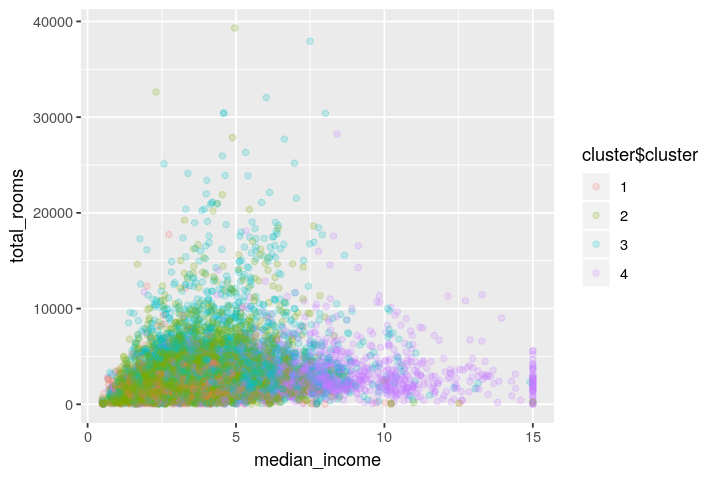

In [430]:
set.seed(20)
cluster <- kmeans(data_n, 4, nstart = 10)

cluster$cluster <- as.factor(cluster$cluster)
ggplot(data, aes(x=median_income, y=total_rooms, color=cluster$cluster)) +
  geom_point(alpha = 0.2)

In [426]:
z_norm <- function(x){
    return ((x-mean(x))/(sd(x)))
}

In [427]:
data_n2 <- as.data.frame(lapply(data[,c(1:3,6,9)], z_norm))

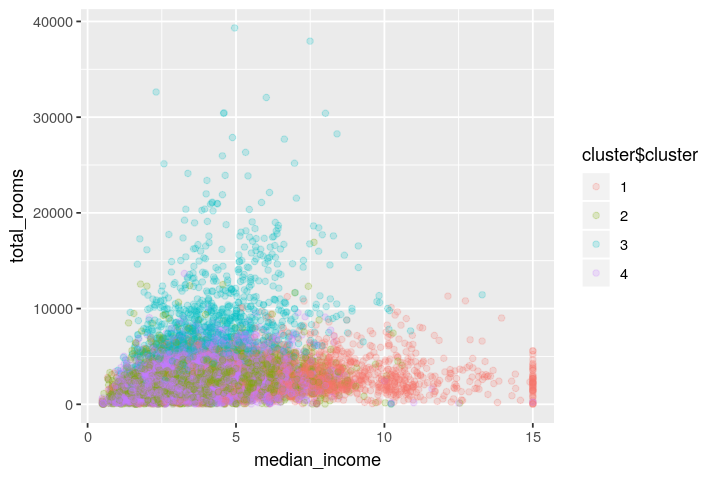

In [429]:
set.seed(20)
cluster <- kmeans(data_n2, 4, nstart = 10)

cluster$cluster <- as.factor(cluster$cluster)
ggplot(data, aes(x=median_income, y=total_rooms, color=cluster$cluster)) +
  geom_point(alpha = 0.2)

Vemos con en estos casos la normalización de las variables tiende a mezclar un poco mas las clases si lo comparamos contra las clases obtenidas de los datos. Esto es algo que no esperabamos